In [231]:
import StringIO

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

import google.datalab.bigquery as bq

import tensorflow as tf

In [232]:
nikkei = bq.Query.from_table(bq.Table('bingo-ml-1.market_data.nikkei'), fields=['Date', 'Close']).execute().result().to_dataframe().set_index('Date')
ftse = bq.Query.from_table(bq.Table('bingo-ml-1.market_data.ftse'), fields=['Date', 'Close']).execute().result().to_dataframe().set_index('Date')

In [221]:
nikkei.to_msgpack(path_or_buf="nikkei", encoding='utf-8')
ftse.to_msgpack(path_or_buf="ftse", encoding='utf-8')

In [223]:
closing_data = pd.DataFrame()

closing_data['nikkei_close'] = nikkei['Close']
closing_data['ftse_close'] = ftse['Close']

In [224]:
closing_data.describe()

,nikkei_close,ftse_close
count,1426.000000,1416.000000
mean,12555.662053,6101.031214
std,3656.852037,555.791179
min,8160.009766,4805.799805
25%,9465.320069,5681.249878
50%,10811.660156,6009.399902
75%,15209.164795,6623.650146
max,20868.029297,7104.000000


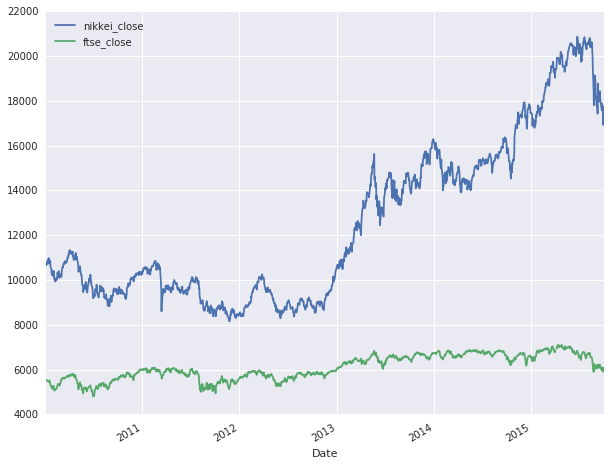

In [196]:
_ = pd.concat([closing_data['nikkei_close'],closing_data['ftse_close']],axis = 1).plot(figsize=(10,8))

In [225]:
closing_data['nikkei_close_scaled'] = closing_data['nikkei_close'] / max(closing_data['nikkei_close'])
closing_data['ftse_close_scaled'] = closing_data['ftse_close'] / max(closing_data['nikkei_close'])

In [233]:
closing_data

,nikkei_close,ftse_close,nikkei_close_scaled,ftse_close_scaled
Date,,,,
2010-02-09,9932.900391,5111.799805,0.475987,0.244958
2010-02-17,10306.830078,5276.600098,0.493905,0.252856
2010-03-08,10585.919922,5606.700195,0.507279,0.268674
2010-03-25,10828.849609,5727.700195,0.518921,0.274473
2011-02-08,10635.980469,6091.299805,0.509678,0.291896
2011-05-30,9504.969727,5938.899902,0.455480,0.284593
2011-06-06,9380.349609,5863.200195,0.449508,0.280966
2011-06-30,9816.089844,5945.700195,0.470389,0.284919
2011-09-07,8763.410156,5318.600098,0.419944,0.254868


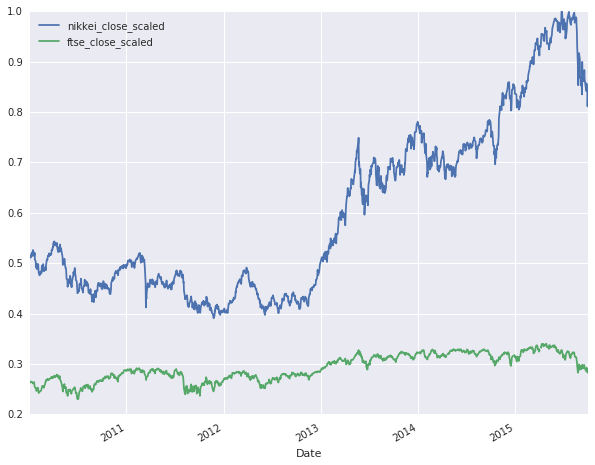

In [226]:
_ = pd.concat([closing_data['nikkei_close_scaled'],  closing_data['ftse_close_scaled']], axis=1).plot(figsize=(10,8))

In [254]:
# Portfolio definition

len_series = len(nikkei)

def price_vector(time_lag, t):
  return closing_data[t-time_lag:t]

def current_price_nikkei(t):
  return closing_data['nikkei_close'][t]

def current_price_scaled_nikkei(t):
  return closing_data['nikkei_close_scaled'][t]

def current_price_ftse(t):
  return closing_data['ftse_close'][t]

def current_price_scaled_ftse(t):
  return closing_data['ftse_close_scaled'][t]

def portfolio_value(portfolio_shares, t):
  prices = [current_price_nikkei(t), current_price_ftse(t)]
  return np.inner(portfolio_shares,prices);

def portfolio_value_scaled(portfolio_shares, t):
  prices = [current_price_scaled_nikkei(t), current_price_scaled_ftse(t)]
  return np.inner(portfolio_shares,prices);

def alpha_fun(shares,t):
  alpha = shares[0]*current_price_nikkei(t)/portfolio_value(shares,t)
  return alpha


In [252]:
price_vector(2,10)

,nikkei_close,ftse_close,nikkei_close_scaled,ftse_close_scaled
Date,,,,
2011-09-07,8763.410156,5318.600098,0.419944,0.254868
2011-10-17,8879.599609,5436.700195,0.425512,0.260528


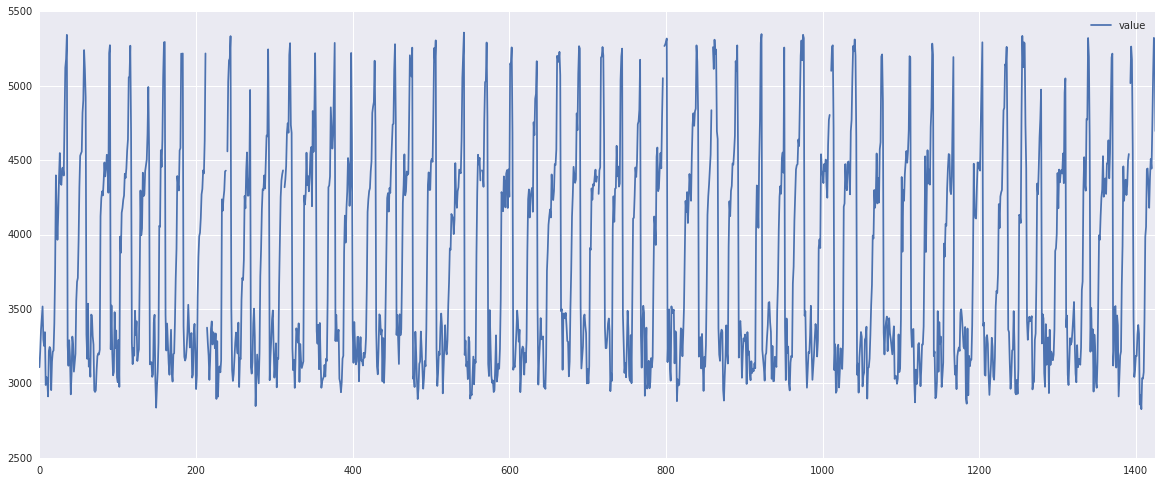

In [262]:
# Initialization

initial_endowment = 1000

# initialize portfolio so to have 80% of capital invested, and alpha = 0.5
invest = 0.8;
invest_cash = invest*initial_endowment
fraction_nikkei = current_price_ftse(0)/current_price_nikkei(0)
ftse_0 = invest_cash/(fraction_nikkei*current_price_ftse(0))
nikkei_0 = ftse_0*fraction_nikkei

# initialize the price vector (prices)
price_0 = price_vector(1,1)

#initialize the shares held in each asset
shares_0=[nikkei_0,ftse_0]


# initialize the value vector (value)
value_0 = portfolio_value(shares,0)
value_scaled_0 = portfolio_value_scaled(shares,0)


# initialize the alpha vector (alpha_vec)
alpha_0 = alpha_fun(shares_0,0)

# initialize the cash vector (cash)
cash_0 = initial_endowment - invest_cash

# initialize the state vector (state)
# buy and hold

state = pd.DataFrame()

state['price_nikkei'] = np.zeros(len_series)
state['price_ftse'] = np.zeros(len_series)
state['portfolio_shares_nikkei'] = np.zeros(len_series)
state['portfolio_shares_ftse'] = np.zeros(len_series)
state['value'] = np.zeros(len_series)
state['value_scaled'] = np.zeros(len_series)
state['alpha'] = np.zeros(len_series)
state['cash'] = np.zeros(len_series)

state['price_nikkei'][0] = current_price_nikkei(0)
state['price_ftse'][0] = current_price_ftse(0)
state['portfolio_shares_nikkei'][0] = shares_0[0]
state['portfolio_shares_ftse'][0] = shares_0[1]
state['value'][0] = value_0
state['value_scaled'][0] = value_scaled_0
state['alpha'][0] = alpha_0
state['cash'][0] = cash_0


state

for time in range(len_series):
  state['price_nikkei'][time] = current_price_nikkei(time)
  state['price_ftse'][time] = current_price_ftse(time)
  state['portfolio_shares_nikkei'][time] = shares_0[0]
  state['portfolio_shares_ftse'][time] = shares_0[1]
  shares_t = [state['portfolio_shares_nikkei'][time],state['portfolio_shares_ftse'][time]]
  state['value'][time] = portfolio_value(shares_t,time)
  state['value_scaled'][time] = portfolio_value_scaled(shares_t,time)
  state['alpha'][time] = alpha_fun(shares_t,time)
  state['cash'][time] = cash_0

_ = pd.concat([state['value']], axis = 1).plot(figsize=(20,8))

In [278]:
# Initialization

initial_endowment = 1000

# initialize portfolio so to have 80% of capital invested, and alpha = 0.5
nikkei_0 = initial_endowment/current_price_nikkei(0)
ftse_0 = 0

# initialize the price vector (prices)
price_0 = price_vector(1,1)

#initialize the shares held in each asset
shares_0 = [nikkei_0,ftse_0]

# initialize the value vector (value)
value_0 = portfolio_value(shares_0,0)
value_scaled_0 = portfolio_value_scaled(shares_0,0)


# initialize the alpha vector (alpha_vec)
alpha_0 = alpha_fun(shares_0,0)

# initialize the cash vector (cash)
cash_0 = initial_endowment - invest_cash

In [ ]:
# initialize the state vector (state)
# buy and hold


state_bh = pd.DataFrame()

state_bh['price_nikkei'] = np.zeros(len_series)
state_bh['price_ftse'] = np.zeros(len_series)
state_bh['portfolio_shares_nikkei'] = nikkei_0*np.ones(len_series)
state_bh['portfolio_shares_ftse'] = ftse_0*np.ones(len_series)
state_bh['value'] = np.zeros(len_series)
state_bh['value_scaled'] = np.zeros(len_series)
state_bh['alpha'] = np.zeros(len_series)
state_bh['cash'] = np.zeros(len_series)

state_bh

In [285]:
# insert state_0

state_bh['price_nikkei'][0] = current_price_nikkei(0)
state_bh['price_ftse'][0] = current_price_ftse(0)
state_bh['value'][0] = value_0
state_bh['value_scaled'][0] = value_scaled_0
state_bh['alpha'][0] = alpha_0
state_bh['cash'][0] = cash_0


state_bh



,price_nikkei,price_ftse,portfolio_shares_nikkei,portfolio_shares_ftse,value,value_scaled,alpha,cash
0,9932.900391,5111.799805,0.100676,0.0,1000.0,0.04792,1.0,200.0
1,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
2,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
3,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
4,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
5,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
6,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
7,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
8,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0
9,0.000000,0.000000,0.100676,0.0,0.0,0.00000,0.0,0.0


,price_nikkei,price_ftse,portfolio_shares_nikkei,portfolio_shares_ftse,value,value_scaled,alpha,cash
0,9932.900391,5111.799805,0.100676,0.0,1000.000000,0.047920,1.0,200.0
1,10306.830078,5276.600098,0.100676,0.0,1037.645569,0.049724,1.0,200.0
2,10585.919922,5606.700195,0.100676,0.0,1065.743087,0.051071,1.0,200.0
3,10828.849609,5727.700195,0.100676,0.0,1090.200161,0.052243,1.0,200.0
4,10635.980469,6091.299805,0.100676,0.0,1070.782959,0.051312,1.0,200.0
5,9504.969727,5938.899902,0.100676,0.0,956.917854,0.045856,1.0,200.0
6,9380.349609,5863.200195,0.100676,0.0,944.371658,0.045254,1.0,200.0
7,9816.089844,5945.700195,0.100676,0.0,988.240036,0.047357,1.0,200.0
8,8763.410156,5318.600098,0.100676,0.0,882.260952,0.042278,1.0,200.0
9,8879.599609,5436.700195,0.100676,0.0,893.958387,0.042839,1.0,200.0


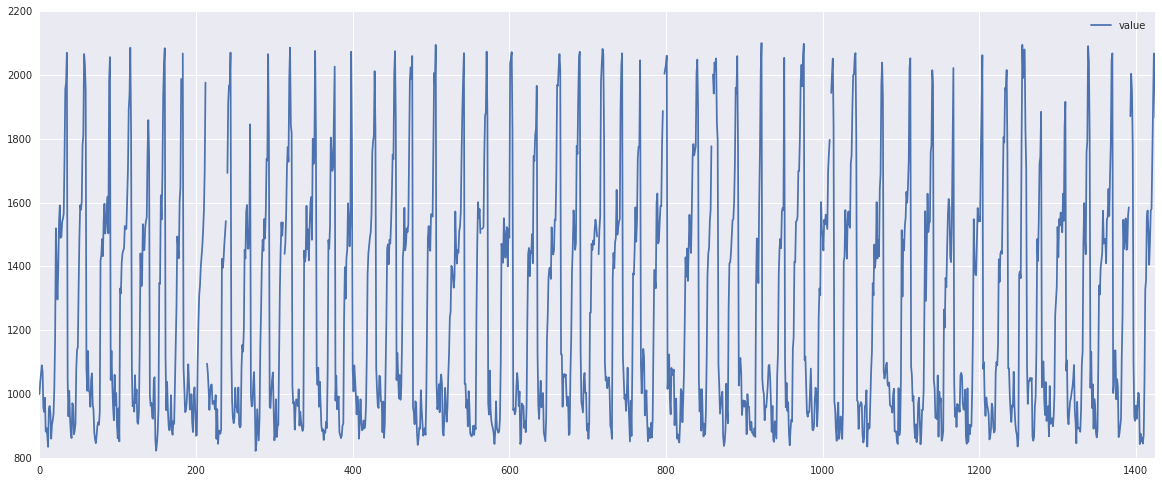

In [286]:
for time in range(len_series):
  state_bh['price_nikkei'][time] = current_price_nikkei(time)
  state_bh['price_ftse'][time] = current_price_ftse(time)
  state_bh['value'][time] = portfolio_value(shares_0,time)
  state_bh['value_scaled'][time] = portfolio_value_scaled(shares_t,time)
  state_bh['alpha'][time] = alpha_fun(shares_t,time)
  state_bh['cash'][time] = cash_0

_ = pd.concat([state_bh['value']], axis = 1).plot(figsize=(20,8))

state_bh